In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import keras

In [2]:
df = pd.read_csv('./DSA_features.csv')

In [3]:
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split

In [7]:
y = df['activity']

In [10]:
X = df.drop(['activity' , 'people'] ,  axis =1)

In [11]:
X

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.29968,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.29974,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.30068,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.30088,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.30041,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.19482,4.033226e-02,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.21407,2.212497e-02,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,-0.47131,9.656444e-02,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,-0.17806,2.448990e-02,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489


In [32]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# LabelEncoder를 사용하여 문자열 레이블을 정수형 레이블로 변환
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# y_train과 y_test를 원-핫 인코딩으로 변환
y_train = to_categorical(y_train, num_classes=n_classes)
y_test = to_categorical(y_test, num_classes=n_classes)

In [ ]:
import numpy as np
from collections import Counter

# split_sequence 함수 (수정됨)
def split_sequence(sequence, labels, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        
        # sequence에서 n_steps 크기만큼 데이터 추출
        seq_x = sequence[i:end_ix]
        
        # labels에서 n_steps 크기만큼 레이블 추출
        seq_y = labels[i:end_ix]
        
        # seq_y에서 가장 많이 등장한 레이블 선택
        most_common_label = Counter(seq_y).most_common(1)[0][0]
        
        # X와 y에 추가
        X.append(seq_x)
        y.append(most_common_label)
    
    return np.array(X), np.array(y)

In [ ]:
# 실제 데이터 적용
sequence = df.drop(['activity','people'], axis=1).values  # 수치형 데이터
labels = df['activity'].values  # 범주형 레이블 'Rings_binned'

# 시퀀스 분리
n_steps = 7
X, y = split_sequence(sequence, labels, n_steps)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# DataFrame을 numpy 배열로 변환
x_train = x_train.values
x_test = x_test.values

# numpy 배열로 변환한 후 reshape 적용
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [26]:

n_classes = len(np.unique(y_train))
n_classes

19

In [ ]:
X.shape

In [ ]:
y.shape

In [34]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

In [35]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_last")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(n_classes, activation="softmax")(x)
    return keras.Model(inputs, outputs)

In [36]:
input_shape = x_train.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["accuracy"],
)
model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=150,
    batch_size=64,
    callbacks=callbacks,
)

model.evaluate(x_test, y_test, verbose=1)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 270, 1)]     0           []                               
                                                                                                  
 multi_head_attention_12 (Multi  (None, 270, 1)      7169        ['input_5[0][0]',                
 HeadAttention)                                                   'input_5[0][0]']                
                                                                                                  
 dropout_27 (Dropout)           (None, 270, 1)       0           ['multi_head_attention_12[0][0]']
                                                                                                  
 layer_normalization_24 (LayerN  (None, 270, 1)      2           ['dropout_27[0][0]']       

2024-10-10 11:04:06.428524: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


92/92 [==============================] - ETA: 0s - loss: 2.9306 - accuracy: 0.0687

2024-10-10 11:07:20.828038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


92/92 [==============================] - 218s 2s/step - loss: 2.9306 - accuracy: 0.0687 - val_loss: 2.8836 - val_accuracy: 0.0890
Epoch 2/150
92/92 [==============================] - 206s 2s/step - loss: 2.8757 - accuracy: 0.1020 - val_loss: 2.8376 - val_accuracy: 0.1151
Epoch 3/150
92/92 [==============================] - 206s 2s/step - loss: 2.8252 - accuracy: 0.1062 - val_loss: 2.7945 - val_accuracy: 0.1137
Epoch 4/150
92/92 [==============================] - 205s 2s/step - loss: 2.7805 - accuracy: 0.1103 - val_loss: 2.7540 - val_accuracy: 0.1089
Epoch 5/150
92/92 [==============================] - 206s 2s/step - loss: 2.7374 - accuracy: 0.1059 - val_loss: 2.7132 - val_accuracy: 0.1110
Epoch 6/150
92/92 [==============================] - 205s 2s/step - loss: 2.6909 - accuracy: 0.1114 - val_loss: 2.6765 - val_accuracy: 0.1110
Epoch 7/150
92/92 [==============================] - 204s 2s/step - loss: 2.6510 - accuracy: 0.1114 - val_loss: 2.6440 - val_accuracy: 0.1110
Epoch 8/150
77/92 

KeyboardInterrupt: 

In [88]:
df.shape

(9120, 272)

In [89]:
df.info

<bound method DataFrame.info of       T_xacc_mean  T_xacc_max  T_xacc_min  T_xacc_var  T_xacc_std  \
0        7.975714      8.1605      7.6823    0.014395    0.119981   
1        7.978250      8.1763      7.8472    0.007551    0.086896   
2        7.970894      8.0860      7.8470    0.003092    0.055603   
3        7.938412      8.1083      7.6901    0.003763    0.061343   
4        7.908930      8.1305      7.8322    0.001741    0.041731   
...           ...         ...         ...         ...         ...   
9115     8.280854     34.1980     -2.9038   28.080803    5.299132   
9116     9.591118     51.6970     -3.4129   35.722025    5.976791   
9117     9.599113     27.9300     -1.0765   48.850886    6.989341   
9118     9.692482     72.7820     -2.6734   59.378336    7.705734   
9119     9.380641     45.0090     -3.5938   40.459334    6.360765   

      T_xacc_skew  T_yacc_mean  T_yacc_max  T_yacc_min  T_yacc_var  ...  \
0       -0.023319     1.083150      1.1832     0.99744    0.0022

In [90]:
df.isnull().values.any()

False

In [91]:
LABELS = ["Normal", "Abnormal"]

In [92]:
df['activity'].unique()

array(['sitting', 'standing', 'lyingBack', 'lyingRigh', 'ascendingStairs',
       'decendingStairs', 'standingInElevatorStill', 'movingInElevator',
       'walkingLot', 'walkingTreadmillFlat', 'walkingTreadmillIncline',
       'runningTreadmill', 'stepper', 'crossTrainer', 'cyclingHorizontal',
       'cyclingVertical', 'rowing', 'jumping', 'basketBall'], dtype=object)

/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_98369/3353177650.py:11: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort=True)


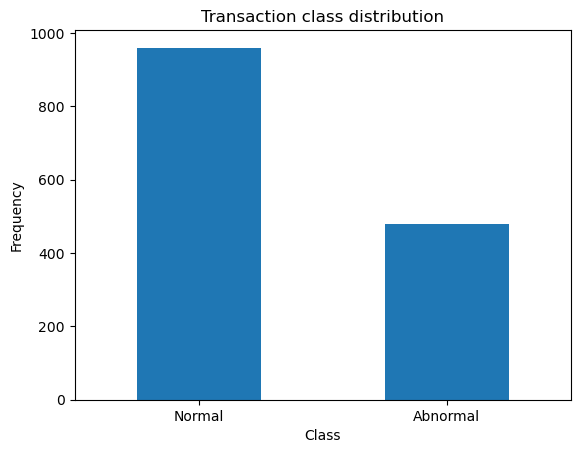

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# 'lyingBack'과 'lyingRigh'는 Normal(0)로, 'jumping'은 Abnormal(1)로 설정
df['Class'] = df['activity'].apply(lambda x: 0 if x in ['lyingBack', 'lyingRigh'] else (1 if x == 'jumping' else None))

# 결측값 제거 (필요에 따라 적용)
df = df.dropna(subset=['Class'])

# Class별 샘플 수 세기
count_classes = pd.value_counts(df['Class'], sort=True)

# 막대 그래프 그리기
LABELS = ['Normal', 'Abnormal']
count_classes.plot(kind='bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [94]:
df['Class'].value_counts()

Class
0.0    960
1.0    480
Name: count, dtype: int64

In [95]:
Abnormal = df[df.Class == 1]
normal = df[df.Class == 0]
Abnormal.shape

(480, 273)

In [96]:
normal.shape

(960, 273)

In [97]:
print(Abnormal.columns)
print(normal.columns)


Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max', 'LL_zmag_min',
       'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew', 'activity', 'people',
       'Class'],
      dtype='object', length=273)
Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max', 'LL_zmag_min',
       'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew', 'activity', 'people',
       'Class'],
      dtype='object', length=273)


In [98]:
X_test = pd.concat([Abnormal, normal])
X_test

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people,Class
8160,8.978253,40.5460,-5.3871,133.210928,11.541704,0.710995,-0.028485,4.6232,-7.3776,1.913818,...,0.026911,-0.452746,-0.42401,-0.48635,0.000261,0.016168,0.032586,jumping,p1,1.0
8161,8.937468,40.4930,-6.7806,122.558637,11.070620,0.595402,-0.031455,2.9872,-5.4906,1.501715,...,0.587490,-0.433809,-0.40023,-0.46888,0.000238,0.015440,0.093940,jumping,p1,1.0
8162,9.275007,42.3080,-4.9602,145.592435,12.066169,0.793694,0.043397,3.3550,-6.8576,1.742066,...,0.494886,-0.404305,-0.34281,-0.45115,0.000443,0.021043,0.243550,jumping,p1,1.0
8163,8.659709,42.1060,-7.8529,153.811145,12.402062,0.912284,-0.141696,4.2339,-5.7269,1.638842,...,0.353853,-0.369328,-0.33381,-0.41835,0.000354,0.018816,-0.312305,jumping,p1,1.0
8164,9.504206,43.7370,-6.3691,158.982033,12.608808,0.760463,0.104321,4.0206,-7.3882,2.183937,...,0.329407,-0.400433,-0.35154,-0.43797,0.000246,0.015679,0.549612,jumping,p1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2.620502,2.6592,2.5891,0.000199,0.014113,0.148452,-9.392025,-9.3424,-9.4207,0.000242,...,0.401254,-0.410987,-0.38221,-0.44605,0.000099,0.009967,-0.597598,lyingRigh,p8,0.0
1916,2.613423,2.6572,2.5815,0.000207,0.014387,0.368746,-9.398851,-9.3657,-9.4356,0.000156,...,0.147180,-0.411248,-0.36581,-0.43676,0.000087,0.009306,1.021454,lyingRigh,p8,0.0
1917,2.614750,2.6576,2.5654,0.000257,0.016018,-0.007991,-9.397350,-9.3628,-9.4313,0.000214,...,0.032341,-0.409787,-0.37926,-0.43431,0.000073,0.008520,0.431012,lyingRigh,p8,0.0
1918,2.620167,2.6589,2.5781,0.000216,0.014691,-0.114904,-9.397014,-9.3649,-9.4539,0.000257,...,0.409508,-0.409101,-0.36074,-0.44087,0.000113,0.010620,1.368666,lyingRigh,p8,0.0


In [99]:
X_train = normal.drop(['Class', 'activity', 'people'], axis=1)

In [100]:
X_train

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
960,-4.834646,-4.7185,-4.9049,0.001124,0.033529,0.632141,-0.501018,-0.41744,-0.59561,0.001016,...,0.56276,9.725263e-07,0.000986,0.074676,-0.532664,-0.52993,-0.53521,9.585668e-07,0.000979,-0.193301
961,-4.780810,-4.5850,-4.8833,0.003948,0.062835,1.052880,-0.480601,-0.40372,-0.63184,0.001297,...,0.56394,6.211659e-07,0.000788,-0.181526,-0.531169,-0.52940,-0.53365,7.608973e-07,0.000872,-0.372381
962,-4.804400,-4.7037,-4.8755,0.001482,0.038496,0.735226,-0.493925,-0.42616,-0.59561,0.000863,...,0.56445,4.579046e-07,0.000677,-0.263115,-0.530569,-0.52873,-0.53222,5.160537e-07,0.000718,0.185587
963,-4.750563,-4.5696,-4.8977,0.004447,0.066683,0.710263,-0.437358,-0.30877,-0.55225,0.003587,...,0.56420,4.703523e-07,0.000686,-0.060925,-0.531167,-0.52962,-0.53283,4.975523e-07,0.000705,-0.145321
964,-4.774916,-4.6741,-4.8457,0.001080,0.032868,0.324779,-0.459456,-0.38900,-0.53714,0.001059,...,0.56455,5.467316e-07,0.000739,0.335811,-0.529804,-0.52706,-0.53251,1.292131e-06,0.001137,-0.026271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2.620502,2.6592,2.5891,0.000199,0.014113,0.148452,-9.392025,-9.34240,-9.42070,0.000242,...,-0.54522,9.195642e-05,0.009589,0.401254,-0.410987,-0.38221,-0.44605,9.935077e-05,0.009967,-0.597598
1916,2.613423,2.6572,2.5815,0.000207,0.014387,0.368746,-9.398851,-9.36570,-9.43560,0.000156,...,-0.55652,7.375030e-05,0.008588,0.147180,-0.411248,-0.36581,-0.43676,8.659481e-05,0.009306,1.021454
1917,2.614750,2.6576,2.5654,0.000257,0.016018,-0.007991,-9.397350,-9.36280,-9.43130,0.000214,...,-0.53640,3.380089e-05,0.005814,0.032341,-0.409787,-0.37926,-0.43431,7.258946e-05,0.008520,0.431012
1918,2.620167,2.6589,2.5781,0.000216,0.014691,-0.114904,-9.397014,-9.36490,-9.45390,0.000257,...,-0.54565,9.044032e-05,0.009510,0.409508,-0.409101,-0.36074,-0.44087,1.127801e-04,0.010620,1.368666


In [101]:
X_train

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
960,-4.834646,-4.7185,-4.9049,0.001124,0.033529,0.632141,-0.501018,-0.41744,-0.59561,0.001016,...,0.56276,9.725263e-07,0.000986,0.074676,-0.532664,-0.52993,-0.53521,9.585668e-07,0.000979,-0.193301
961,-4.780810,-4.5850,-4.8833,0.003948,0.062835,1.052880,-0.480601,-0.40372,-0.63184,0.001297,...,0.56394,6.211659e-07,0.000788,-0.181526,-0.531169,-0.52940,-0.53365,7.608973e-07,0.000872,-0.372381
962,-4.804400,-4.7037,-4.8755,0.001482,0.038496,0.735226,-0.493925,-0.42616,-0.59561,0.000863,...,0.56445,4.579046e-07,0.000677,-0.263115,-0.530569,-0.52873,-0.53222,5.160537e-07,0.000718,0.185587
963,-4.750563,-4.5696,-4.8977,0.004447,0.066683,0.710263,-0.437358,-0.30877,-0.55225,0.003587,...,0.56420,4.703523e-07,0.000686,-0.060925,-0.531167,-0.52962,-0.53283,4.975523e-07,0.000705,-0.145321
964,-4.774916,-4.6741,-4.8457,0.001080,0.032868,0.324779,-0.459456,-0.38900,-0.53714,0.001059,...,0.56455,5.467316e-07,0.000739,0.335811,-0.529804,-0.52706,-0.53251,1.292131e-06,0.001137,-0.026271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2.620502,2.6592,2.5891,0.000199,0.014113,0.148452,-9.392025,-9.34240,-9.42070,0.000242,...,-0.54522,9.195642e-05,0.009589,0.401254,-0.410987,-0.38221,-0.44605,9.935077e-05,0.009967,-0.597598
1916,2.613423,2.6572,2.5815,0.000207,0.014387,0.368746,-9.398851,-9.36570,-9.43560,0.000156,...,-0.55652,7.375030e-05,0.008588,0.147180,-0.411248,-0.36581,-0.43676,8.659481e-05,0.009306,1.021454
1917,2.614750,2.6576,2.5654,0.000257,0.016018,-0.007991,-9.397350,-9.36280,-9.43130,0.000214,...,-0.53640,3.380089e-05,0.005814,0.032341,-0.409787,-0.37926,-0.43431,7.258946e-05,0.008520,0.431012
1918,2.620167,2.6589,2.5781,0.000216,0.014691,-0.114904,-9.397014,-9.36490,-9.45390,0.000257,...,-0.54565,9.044032e-05,0.009510,0.409508,-0.409101,-0.36074,-0.44087,1.127801e-04,0.010620,1.368666


In [102]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 가정: X_test는 이미 정의된 데이터프레임입니다.

# 'activity', 'people', 'Class' 열을 제외한 데이터만 추출하여 스케일링

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_train)

# 스케일링된 데이터를 DataFrame으로 변환
scaled_X_train = pd.DataFrame(scaled_features, columns=X_train.columns)

# 결과 출력
scaled_X_train

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
0,-1.284643,-1.287445,-1.264521,-0.091235,-0.130391,1.293948,0.892481,0.886692,0.899934,-0.116043,...,0.741525,-0.141289,-0.293535,0.120756,-0.391035,-0.398140,-0.383163,-0.128573,-0.323099,-0.219429
1,-1.265346,-1.239346,-1.256829,0.002035,0.480205,2.127967,0.897184,0.889847,0.891559,-0.100364,...,0.744028,-0.142472,-0.326798,-0.402114,-0.388128,-0.397107,-0.380127,-0.129875,-0.350275,-0.571525
2,-1.273802,-1.282112,-1.254051,-0.079420,-0.026906,1.498289,0.894115,0.884687,0.899934,-0.124633,...,0.745110,-0.143022,-0.345519,-0.568625,-0.386960,-0.395801,-0.377344,-0.131486,-0.389454,0.525521
3,-1.254504,-1.233798,-1.261957,0.018495,0.560377,1.448807,0.907144,0.911679,0.909958,0.027760,...,0.744580,-0.142980,-0.343984,-0.155985,-0.388123,-0.397536,-0.378531,-0.131608,-0.392762,-0.125092
4,-1.263233,-1.271448,-1.243439,-0.092685,-0.144164,0.684672,0.902054,0.893231,0.913451,-0.113683,...,0.745322,-0.142723,-0.334982,0.653693,-0.385472,-0.392546,-0.377909,-0.126378,-0.282970,0.108977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,1.387633,1.370657,1.404301,-0.121786,-0.534929,0.335144,-1.155406,-1.165444,-1.140190,-0.159380,...,-1.608766,0.165187,1.151541,0.787254,-0.154296,-0.110222,-0.209634,0.519106,1.964745,-1.014336
956,1.385095,1.369937,1.401595,-0.121527,-0.529207,0.771827,-1.156979,-1.170801,-1.143635,-0.164200,...,-1.632736,0.103861,0.983304,0.268727,-0.154805,-0.078257,-0.191553,0.435138,1.796282,2.168957
957,1.385571,1.370081,1.395861,-0.119890,-0.495238,0.025033,-1.156633,-1.170135,-1.142641,-0.160933,...,-1.590056,-0.030708,0.517367,0.034356,-0.151962,-0.104472,-0.186785,0.342946,1.596299,1.008062
958,1.387512,1.370549,1.400384,-0.121236,-0.522880,-0.186899,-1.156556,-1.170617,-1.147865,-0.158533,...,-1.609678,0.160080,1.138208,0.804099,-0.150627,-0.068375,-0.199553,0.607507,2.130780,2.851627


In [103]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 가정: X_test는 이미 정의된 데이터프레임입니다.

# 'activity', 'people', 'Class' 열을 제외한 데이터만 추출하여 스케일링
features = X_test.drop(['activity', 'people', 'Class'], axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 스케일링된 데이터를 DataFrame으로 변환
scaled_X_test = pd.DataFrame(scaled_features, columns=features.columns)

# 결과 출력
scaled_X_test

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
0,1.245884,1.377348,-0.501758,1.086338,1.360408,0.722969,0.827854,1.085533,-0.340741,0.024398,...,-0.245923,0.178284,0.762128,-0.177939,-0.506292,-0.498646,-0.528797,-0.180767,0.119373,0.049311
1,1.238364,1.374750,-0.843667,0.952412,1.277344,0.534648,0.827096,0.797479,0.065043,-0.089578,...,-0.083568,-0.065630,0.429245,1.033077,-0.470510,-0.454645,-0.495151,-0.190747,0.086673,0.154914
2,1.300596,1.463733,-0.397015,1.242005,1.452885,0.857697,0.846208,0.862238,-0.228920,-0.023104,...,-0.022694,-0.063276,0.432933,0.833026,-0.414757,-0.348399,-0.461003,-0.102096,0.338334,0.412423
3,1.187154,1.453830,-1.106765,1.345335,1.512112,1.050900,0.798947,1.016988,0.014229,-0.051653,...,0.039301,-0.156206,0.276678,0.528352,-0.348662,-0.331746,-0.397832,-0.140601,0.238283,-0.544319
4,1.342854,1.533792,-0.742701,1.410346,1.548566,0.803560,0.861764,0.979432,-0.343021,0.099105,...,-0.098156,0.038205,0.581708,0.475541,-0.407439,-0.364552,-0.435619,-0.187520,0.097414,0.939220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,0.073706,-0.480105,1.455277,-0.588456,-0.672206,-0.193505,-1.562998,-1.373423,-0.780094,-0.504844,...,-1.530519,-0.378513,-0.301860,0.630753,-0.427383,-0.421302,-0.451181,-0.251048,-0.159130,-1.035369
1436,0.072400,-0.480203,1.453412,-0.588456,-0.672157,0.165390,-1.564741,-1.377526,-0.783298,-0.504868,...,-1.556611,-0.386765,-0.341703,0.081878,-0.427877,-0.390957,-0.433289,-0.256580,-0.188857,1.751360
1437,0.072645,-0.480183,1.449462,-0.588455,-0.671870,-0.448374,-1.564358,-1.377015,-0.782373,-0.504851,...,-1.510154,-0.404874,-0.452051,-0.166210,-0.425115,-0.415844,-0.428570,-0.262653,-0.224145,0.735085
1438,0.073644,-0.480119,1.452578,-0.588456,-0.672104,-0.622553,-1.564272,-1.377385,-0.787233,-0.504839,...,-1.531512,-0.379200,-0.305018,0.648584,-0.423819,-0.381575,-0.441204,-0.245224,-0.129832,2.348985


In [104]:
X_test

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people,Class
8160,8.978253,40.5460,-5.3871,133.210928,11.541704,0.710995,-0.028485,4.6232,-7.3776,1.913818,...,0.026911,-0.452746,-0.42401,-0.48635,0.000261,0.016168,0.032586,jumping,p1,1.0
8161,8.937468,40.4930,-6.7806,122.558637,11.070620,0.595402,-0.031455,2.9872,-5.4906,1.501715,...,0.587490,-0.433809,-0.40023,-0.46888,0.000238,0.015440,0.093940,jumping,p1,1.0
8162,9.275007,42.3080,-4.9602,145.592435,12.066169,0.793694,0.043397,3.3550,-6.8576,1.742066,...,0.494886,-0.404305,-0.34281,-0.45115,0.000443,0.021043,0.243550,jumping,p1,1.0
8163,8.659709,42.1060,-7.8529,153.811145,12.402062,0.912284,-0.141696,4.2339,-5.7269,1.638842,...,0.353853,-0.369328,-0.33381,-0.41835,0.000354,0.018816,-0.312305,jumping,p1,1.0
8164,9.504206,43.7370,-6.3691,158.982033,12.608808,0.760463,0.104321,4.0206,-7.3882,2.183937,...,0.329407,-0.400433,-0.35154,-0.43797,0.000246,0.015679,0.549612,jumping,p1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2.620502,2.6592,2.5891,0.000199,0.014113,0.148452,-9.392025,-9.3424,-9.4207,0.000242,...,0.401254,-0.410987,-0.38221,-0.44605,0.000099,0.009967,-0.597598,lyingRigh,p8,0.0
1916,2.613423,2.6572,2.5815,0.000207,0.014387,0.368746,-9.398851,-9.3657,-9.4356,0.000156,...,0.147180,-0.411248,-0.36581,-0.43676,0.000087,0.009306,1.021454,lyingRigh,p8,0.0
1917,2.614750,2.6576,2.5654,0.000257,0.016018,-0.007991,-9.397350,-9.3628,-9.4313,0.000214,...,0.032341,-0.409787,-0.37926,-0.43431,0.000073,0.008520,0.431012,lyingRigh,p8,0.0
1918,2.620167,2.6589,2.5781,0.000216,0.014691,-0.114904,-9.397014,-9.3649,-9.4539,0.000257,...,0.409508,-0.409101,-0.36074,-0.44087,0.000113,0.010620,1.368666,lyingRigh,p8,0.0


In [105]:
# 입력 데이터의 차원 수를 정의합니다. X_train의 열 개수와 동일하게 설정합니다.
input_dim = X_train.shape[1]

# 인코딩 차원 수를 설정합니다. 이는 잠재 공간(latent space)의 크기이며, 원하는 값으로 조정할 수 있습니다.
encoding_dim = 14  # 압축할 차원의 크기

# 입력 레이어를 정의합니다. 입력 데이터의 형태를 지정합니다.
input_layer = Input(shape=(input_dim,))

# 인코딩 과정: 입력 레이어에서 14개의 뉴런을 가진 은닉층으로 압축합니다.
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# 인코딩된 값을 절반 크기의 은닉층으로 한 번 더 압축합니다.
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)

# 디코딩 과정: 인코딩된 값을 다시 원래 차원의 절반 크기 은닉층으로 복원합니다.
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)

# 원래 입력 차원 크기로 복원하는 출력 레이어를 정의합니다.
# 출력값은 0과 1 사이로 제한하기 위해 'sigmoid' 활성화 함수를 사용합니다.
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# 입력 레이어와 출력 레이어를 연결하여 오토인코더 모델을 생성합니다.
autoencoder = Model(inputs=input_layer, outputs=decoded)

# 오토인코더 모델을 컴파일합니다.
# Adam 옵티마이저를 사용하며, 학습률(learning_rate)은 0.001로 설정합니다.
# 손실 함수로 평균 제곱 오차(mse)를 사용하여 입력과 출력 간의 차이를 최소화합니다.
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# 모델의 요약 정보를 출력하여 모델 구조를 확인합니다.
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 270)]             0         
                                                                 
 dense_8 (Dense)             (None, 14)                3794      
                                                                 
 dense_9 (Dense)             (None, 7)                 105       
                                                                 
 dense_10 (Dense)            (None, 7)                 56        
                                                                 
 dense_11 (Dense)            (None, 270)               2160      
                                                                 
Total params: 6,115
Trainable params: 6,115
Non-trainable params: 0
_________________________________________________________________


In [106]:
# 훈련데이터의 0.1 을 validation data로 사용
history = autoencoder.fit(X_train,X_train, 
                          epochs=50, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_split = 0.1)

Epoch 1/50
1/4 [======>.......................] - ETA: 0s - loss: 5.8575

2024-10-10 10:03:19.200213: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 73ms/step - loss: 5.7634 - val_loss: 5.6418
Epoch 2/50
4/4 [==============================] - 0s 12ms/step - loss: 5.7419 - val_loss: 5.6247
Epoch 3/50
4/4 [==============================] - 0s 10ms/step - loss: 5.7182 - val_loss: 5.6026
Epoch 4/50
4/4 [==============================] - 0s 11ms/step - loss: 5.6886 - val_loss: 5.5753
Epoch 5/50
1/4 [======>.......................] - ETA: 0s - loss: 5.5874

2024-10-10 10:03:19.514039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 11ms/step - loss: 5.6487 - val_loss: 5.5401
Epoch 6/50
4/4 [==============================] - 0s 10ms/step - loss: 5.5961 - val_loss: 5.4981
Epoch 7/50
4/4 [==============================] - 0s 10ms/step - loss: 5.5341 - val_loss: 5.4501
Epoch 8/50
4/4 [==============================] - 0s 10ms/step - loss: 5.4651 - val_loss: 5.3972
Epoch 9/50
4/4 [==============================] - 0s 10ms/step - loss: 5.3929 - val_loss: 5.3413
Epoch 10/50
4/4 [==============================] - 0s 10ms/step - loss: 5.3219 - val_loss: 5.2851
Epoch 11/50
4/4 [==============================] - 0s 10ms/step - loss: 5.2550 - val_loss: 5.2305
Epoch 12/50
4/4 [==============================] - 0s 10ms/step - loss: 5.1967 - val_loss: 5.1798
Epoch 13/50
4/4 [==============================] - 0s 10ms/step - loss: 5.1477 - val_loss: 5.1341
Epoch 14/50
4/4 [==============================] - 0s 10ms/step - loss: 5.1082 - val_loss: 5.0949
Epoch 15/50
4/4 [===================

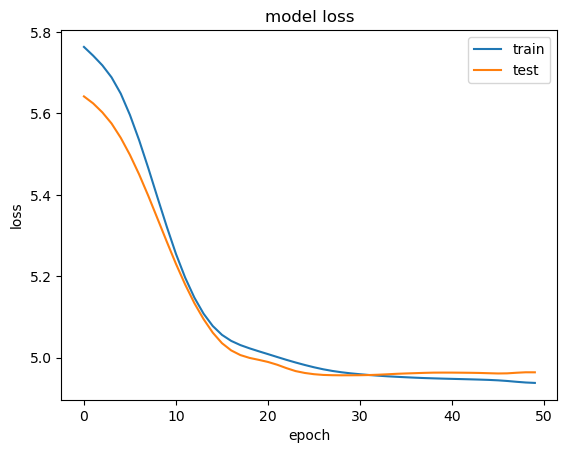

In [107]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [108]:
X_test

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people,Class
8160,8.978253,40.5460,-5.3871,133.210928,11.541704,0.710995,-0.028485,4.6232,-7.3776,1.913818,...,0.026911,-0.452746,-0.42401,-0.48635,0.000261,0.016168,0.032586,jumping,p1,1.0
8161,8.937468,40.4930,-6.7806,122.558637,11.070620,0.595402,-0.031455,2.9872,-5.4906,1.501715,...,0.587490,-0.433809,-0.40023,-0.46888,0.000238,0.015440,0.093940,jumping,p1,1.0
8162,9.275007,42.3080,-4.9602,145.592435,12.066169,0.793694,0.043397,3.3550,-6.8576,1.742066,...,0.494886,-0.404305,-0.34281,-0.45115,0.000443,0.021043,0.243550,jumping,p1,1.0
8163,8.659709,42.1060,-7.8529,153.811145,12.402062,0.912284,-0.141696,4.2339,-5.7269,1.638842,...,0.353853,-0.369328,-0.33381,-0.41835,0.000354,0.018816,-0.312305,jumping,p1,1.0
8164,9.504206,43.7370,-6.3691,158.982033,12.608808,0.760463,0.104321,4.0206,-7.3882,2.183937,...,0.329407,-0.400433,-0.35154,-0.43797,0.000246,0.015679,0.549612,jumping,p1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2.620502,2.6592,2.5891,0.000199,0.014113,0.148452,-9.392025,-9.3424,-9.4207,0.000242,...,0.401254,-0.410987,-0.38221,-0.44605,0.000099,0.009967,-0.597598,lyingRigh,p8,0.0
1916,2.613423,2.6572,2.5815,0.000207,0.014387,0.368746,-9.398851,-9.3657,-9.4356,0.000156,...,0.147180,-0.411248,-0.36581,-0.43676,0.000087,0.009306,1.021454,lyingRigh,p8,0.0
1917,2.614750,2.6576,2.5654,0.000257,0.016018,-0.007991,-9.397350,-9.3628,-9.4313,0.000214,...,0.032341,-0.409787,-0.37926,-0.43431,0.000073,0.008520,0.431012,lyingRigh,p8,0.0
1918,2.620167,2.6589,2.5781,0.000216,0.014691,-0.114904,-9.397014,-9.3649,-9.4539,0.000257,...,0.409508,-0.409101,-0.36074,-0.44087,0.000113,0.010620,1.368666,lyingRigh,p8,0.0


In [109]:
testdata = X_test['Class']
X_test = X_test.drop(['activity', 'people', 'Class'], axis=1)


In [110]:
predictions = autoencoder.predict(X_test)


45/45 [==============================] - 0s 2ms/step


2024-10-10 10:03:25.666434: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [111]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
len(mse)

1440

In [112]:
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': testdata})
error_df.describe()

,reconstruction_error,true_class
count,1440.000000,1440.000000
mean,175.463807,0.333333
std,348.535286,0.471568
min,4.498476,0.000000
25%,4.703991,0.000000
50%,5.033002,0.000000
75%,145.512864,1.000000
max,2930.911926,1.000000


In [113]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정

threshold = 10

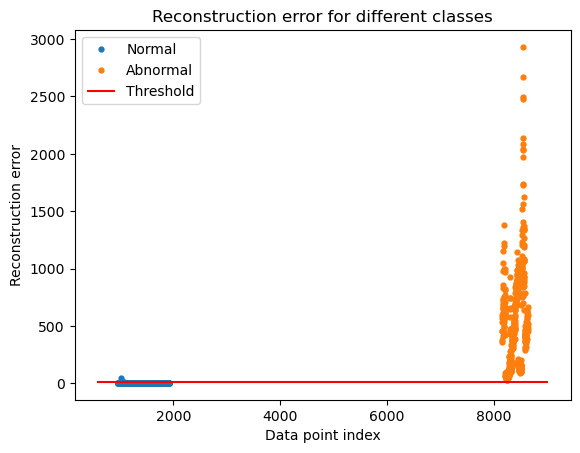

In [114]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Abnormal" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

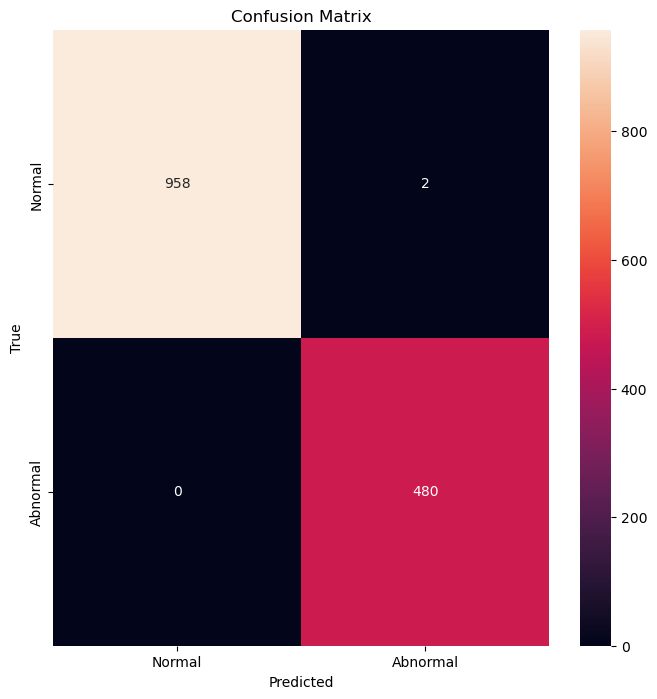

In [115]:
# NaN 값이 있는 행을 제거
error_df = error_df.dropna(subset=['true_class'])

# 이후 confusion_matrix 계산
y_pred = [1 if e > threshold else 0 for e in error_df['reconstruction_error'].values]
conf_matrix = confusion_matrix(error_df['true_class'], y_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [116]:
print(classification_report(error_df.true_class, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       960
         1.0       1.00      1.00      1.00       480

    accuracy                           1.00      1440
   macro avg       1.00      1.00      1.00      1440
weighted avg       1.00      1.00      1.00      1440

